In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("EjemploCelonis.csv") 
df.columns = ['Empleado', 'Entrada', 'Rellenado jornada', 'Comida', 'Salida']

In [3]:
df

,Empleado,Entrada,Rellenado jornada,Comida,Salida
0,Jorge,14/02/2022 09:00,NaN,14/02/2022 13:01,14/02/2022 19:15
1,Lorena,14/02/2022 08:50,14/02/2022 08:52,14/02/2022 13:05,14/02/2022 19:20
2,Miguel,14/02/2022 09:10,14/02/2022 09:15,14/02/2022 13:00,14/02/2022 19:21
3,Larissa,14/02/2022 08:59,14/02/2022 16:58,14/02/2022 13:02,14/02/2022 19:14


In [4]:
columns = ["Entrada", "Rellenado jornada", "Comida", "Salida"]

df["Activity"]=str
df_new = pd.DataFrame(columns = [col for col in df.columns if col not in columns])
for col in columns:
    for (idx,row) in df.iterrows():
        if not pd.isna(row.loc[col]):
            row["Activity"]=col
            row["Timestamp"]=row[col]
            df_new = df_new.append(row)
df_new = df_new.drop(columns=columns).reset_index(drop=True)
df_new

,Empleado,Activity,Timestamp
0,Jorge,Entrada,14/02/2022 09:00
1,Lorena,Entrada,14/02/2022 08:50
2,Miguel,Entrada,14/02/2022 09:10
3,Larissa,Entrada,14/02/2022 08:59
4,Lorena,Rellenado jornada,14/02/2022 08:52
5,Miguel,Rellenado jornada,14/02/2022 09:15
6,Larissa,Rellenado jornada,14/02/2022 16:58
7,Jorge,Comida,14/02/2022 13:01
8,Lorena,Comida,14/02/2022 13:05
9,Miguel,Comida,14/02/2022 13:00


In [5]:
events = df_new.copy()
events['Timestamp'] =  pd.to_datetime(events['Timestamp'])

In [6]:
events = events.rename(columns={'Timestamp': "datetime"}, errors="raise")
case_starts_ends = events.pivot_table(index='Empleado', aggfunc={'datetime': ['min', 'max']}) 
case_starts_ends = case_starts_ends.reset_index() 
case_starts_ends.columns = ['Empleado', 'caseend', 'casestart']
events = events.merge(case_starts_ends, on='Empleado') 

In [7]:
events['relativetime'] = events['datetime'] - events['casestart']
events['relativetime_s'] = events['relativetime'].dt.seconds + 86400*events['relativetime'].dt.days 
events['relativedays'] = events['relativetime'].dt.days

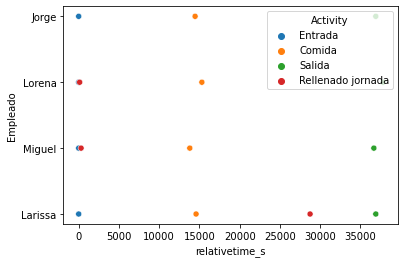

In [8]:
ax = sns.scatterplot(x=events['relativetime_s'],
y = events['Empleado'], hue=events["Activity"])
plt.show()

In [9]:
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes  import importer as xes_importer

In [10]:
eventlog = events.copy()
eventlog = eventlog.sort_values(by=["Empleado", "datetime"], ascending=True)

In [11]:
eventlog

,Empleado,Activity,datetime,caseend,casestart,relativetime,relativetime_s,relativedays
0,Jorge,Entrada,2022-02-14 09:00:00,2022-02-14 19:15:00,2022-02-14 09:00:00,0 days 00:00:00,0,0
1,Jorge,Comida,2022-02-14 13:01:00,2022-02-14 19:15:00,2022-02-14 09:00:00,0 days 04:01:00,14460,0
2,Jorge,Salida,2022-02-14 19:15:00,2022-02-14 19:15:00,2022-02-14 09:00:00,0 days 10:15:00,36900,0
11,Larissa,Entrada,2022-02-14 08:59:00,2022-02-14 19:14:00,2022-02-14 08:59:00,0 days 00:00:00,0,0
13,Larissa,Comida,2022-02-14 13:02:00,2022-02-14 19:14:00,2022-02-14 08:59:00,0 days 04:03:00,14580,0
12,Larissa,Rellenado jornada,2022-02-14 16:58:00,2022-02-14 19:14:00,2022-02-14 08:59:00,0 days 07:59:00,28740,0
14,Larissa,Salida,2022-02-14 19:14:00,2022-02-14 19:14:00,2022-02-14 08:59:00,0 days 10:15:00,36900,0
3,Lorena,Entrada,2022-02-14 08:50:00,2022-02-14 19:20:00,2022-02-14 08:50:00,0 days 00:00:00,0,0
4,Lorena,Rellenado jornada,2022-02-14 08:52:00,2022-02-14 19:20:00,2022-02-14 08:50:00,0 days 00:02:00,120,0
5,Lorena,Comida,2022-02-14 13:05:00,2022-02-14 19:20:00,2022-02-14 08:50:00,0 days 04:15:00,15300,0


In [12]:
eventlog.rename(columns={'datetime': 'time:timestamp', 
                         'Empleado': 'case:concept:name', 
                         'Activity': 'concept:name'}, inplace=True)

In [13]:
log = log_converter.apply(eventlog)

In [14]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)

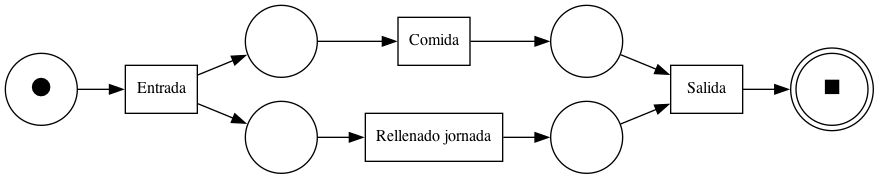

In [15]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

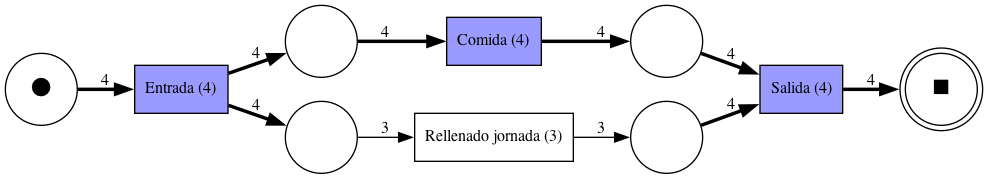

In [16]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)
pn_visualizer.view(gviz)

In [17]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

In [18]:
heu_net = heuristics_miner.apply_heu(log)

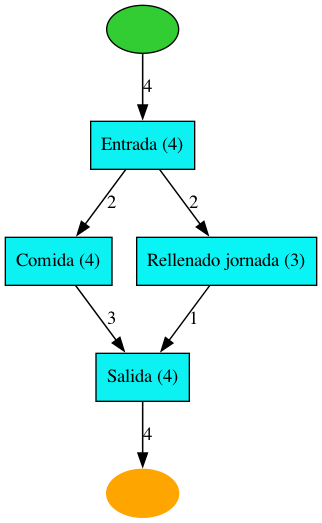

In [19]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

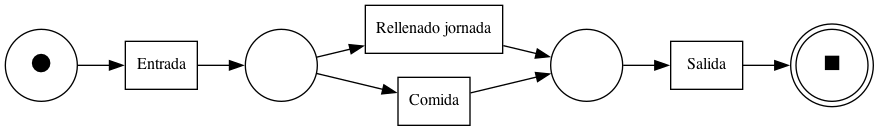

In [20]:
net, im, fm = heuristics_miner.apply(log)

gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [21]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

tree = inductive_miner.apply_tree(log)

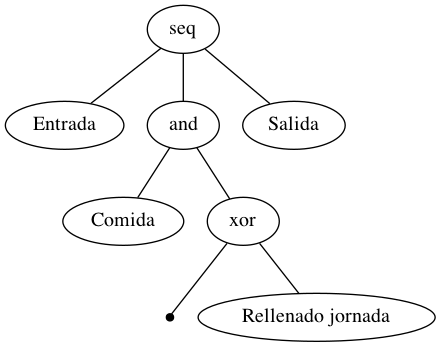

In [22]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

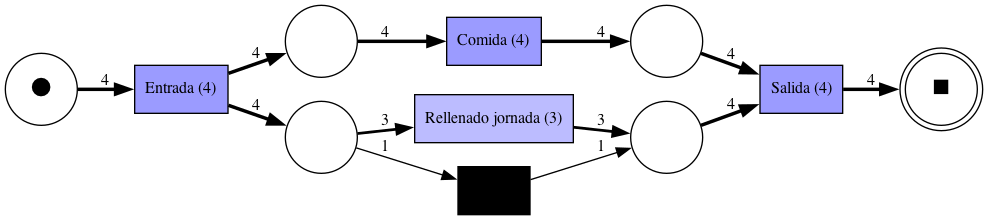

In [23]:
from pm4py.objects.conversion.process_tree import converter as pt_converter

net, initial_marking, final_marking = inductive_miner.apply(log)

net, initial_marking, final_marking = pt_converter.apply(tree)

gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gviz)

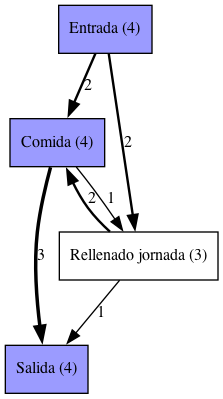

In [24]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(log)

gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)